# Predictions on player success by position in the NFL 

In [259]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

%matplotlib inline

Data used from http://www.pro-football-reference.com/.

## Quarterback


In [348]:
df = pd.read_html('http://pfref.com/tiny/I2c8z')[0]
df = df.drop(df[df['Player']=='Player'].index)

df = df[df.AV > 10]

In [349]:
train = df[df['AV'].notnull()].drop(['Rk', 'Pos', 'College', 'BenchReps', 'Drafted (tm/rnd/yr)'], 1).dropna()
train['Height_inches'] = 12*train['Height'].str.extract('([0-9]+)-([0-9]*\.?[0-9]+)')[0].astype(int) + train['Height'].str.extract('([0-9]+)-([0-9]*\.?[0-9]+)')[1].astype(int)
train = train.drop(['Height'], 1)

predict = df[pd.isnull(df['AV'])].drop(['Rk', 'Pos', 'College', 'BenchReps', 'AV', 'Drafted (tm/rnd/yr)', 'School'], 1).dropna()
predict['Height_inches'] = 12*predict['Height'].str.extract('([0-9]+)-([0-9]*\.?[0-9]+)')[0].astype(int) + predict['Height'].str.extract('([0-9]+)-([0-9]*\.?[0-9]+)')[1].astype(int)
predict = predict.drop(['Height'], 1)

X = train.drop(['Year', 'School', 'Player'], 1).astype(np.number)
y = train['AV'].astype(np.number)

In [350]:
X

,AV,Wt,40YD,Vertical,Broad Jump,3Cone,Shuttle,Height_inches
18,13,231,4.97,28.5,103,7.16,4.36,76
22,9,222,4.52,36.0,121,6.87,4.11,76
23,0,229,5.14,31.0,105,7.29,4.39,78
32,0,248,4.61,35.5,118,7.05,4.18,78
33,0,206,4.66,34.0,116,7.07,4.33,72
34,0,228,4.97,27.0,105,7.33,4.36,76
37,19,232,4.93,32.5,115,7.08,4.21,77
40,5,207,4.68,31.5,113,6.75,4.03,72
43,1,226,4.97,30.5,110,7.04,4.26,74
46,3,220,4.94,28.0,99,7.18,4.34,75


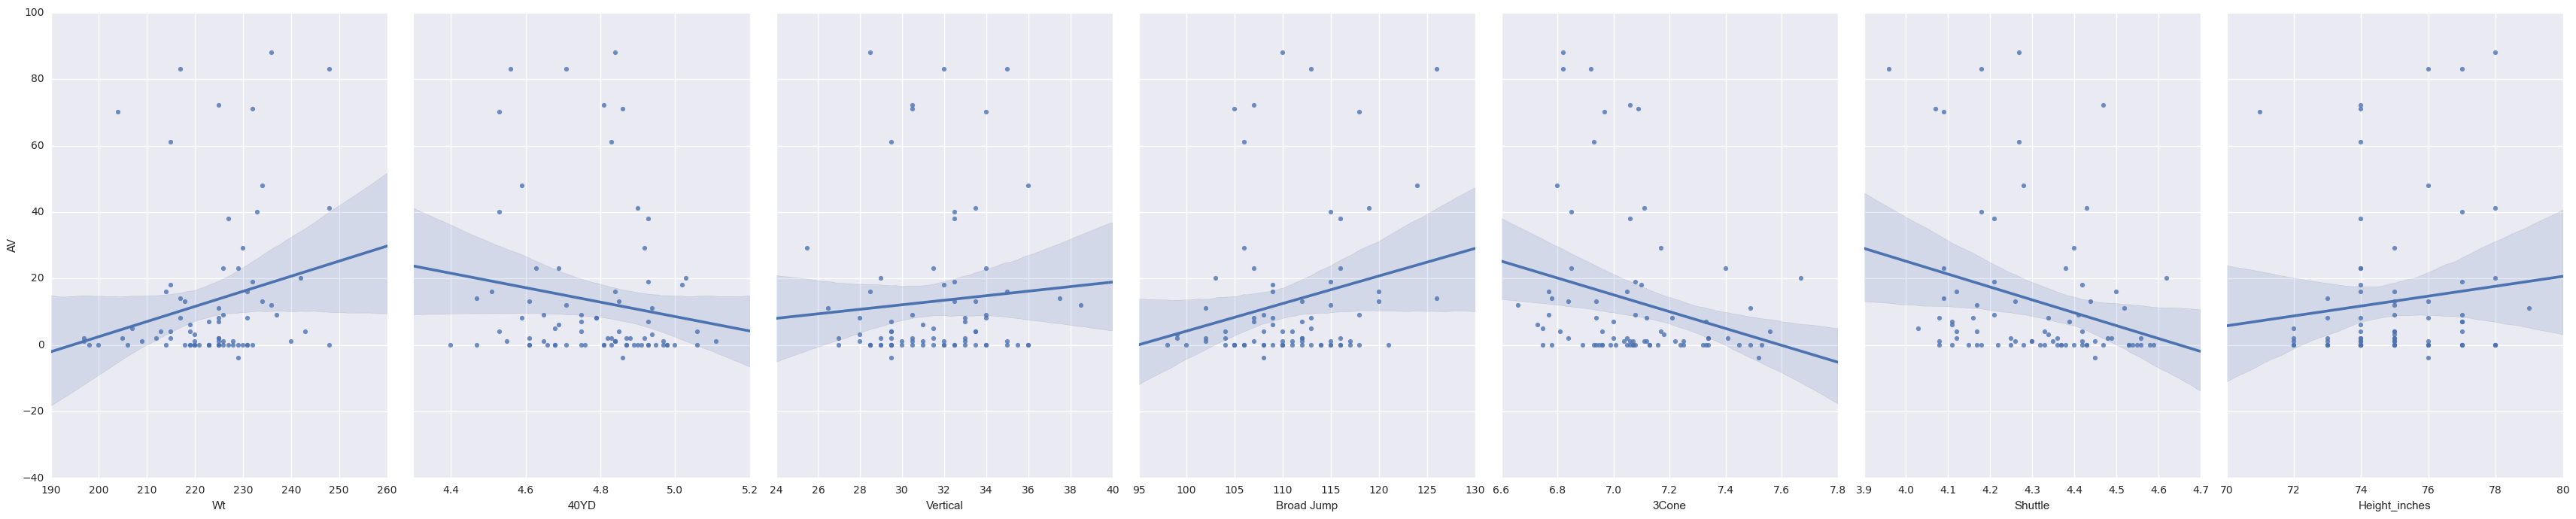

In [322]:
sns.pairplot(X, x_vars = ['Wt', '40YD', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'Height_inches']
             , y_vars='AV', size=7, aspect=0.7, kind='reg');

In [324]:
X = preprocessing.scale(train.drop(['Year', 'School', 'Player', 'AV'], 1).astype(np.number))
y = preprocessing.scale(train['AV'].astype(np.number))

lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X, y, cv = 10, scoring='mean_squared_error')
print(scores)

[-0.57564726 -1.53710795 -1.11475436 -0.85128643 -1.13989255 -0.78622865
 -1.29436983 -0.26947971 -0.59672664 -2.49378376]


In [326]:
lm.fit(X, y)
predict['AV'] = pd.Series(lm.predict(preprocessing.scale(predict.drop(['Year', 'Player'], 1))), index=predict.index)

In [327]:
predict[predict.Year.astype(int) > 2013]

,Year,Player,Wt,40YD,Vertical,Broad Jump,3Cone,Shuttle,Height_inches,AV
2,2014,Keith Wenning,218,5.00,28.0,100,7.07,4.25,75,-0.020469
4,2014,Tajh Boyd,222,4.84,30.5,106,7.33,4.23,73,0.053638
8,2014,David Fales,212,4.99,28.0,103,7.55,4.50,74,-0.642543
10,2014,Jordan Lynch,217,4.76,29.5,109,6.55,4.20,72,0.550009
11,2014,Dustin Vaughan,235,4.95,29.0,108,7.25,4.43,77,0.188952
12,2014,Jeff Mathews,223,5.26,25.5,105,7.14,4.36,76,-0.103679
15,2014,Stephen Morris,213,4.63,30.0,111,7.36,4.49,74,-0.196611
17,2014,Bryn Renner,228,4.87,25.5,108,7.22,4.30,75,0.515773
